First, import the modules and data we use. Pandas gives us easy functionality for dealing with data frames and sklearn contains the linear model functionality we'll use. The head method on a data frame lets us see what the data looks like. 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt

nba_standings_mar23 = pd.read_csv('./data.csv')
nba_standings_mar23.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Boston Celtics,E,A,52,23,0.693,6.37,118.96,112.42,6.54,6.11,119.02,112.73,6.29
1,2,Cleveland Cavaliers,E,C,48,28,0.632,5.66,117.34,111.43,5.91,5.62,117.40,111.52,5.88
2,3,Philadelphia 76ers,E,A,49,26,0.653,4.59,118.77,114.10,4.67,4.48,118.81,114.24,4.57
3,4,Milwaukee Bucks,E,C,54,21,0.720,4.36,115.92,111.72,4.20,4.14,115.79,111.79,4.00
4,5,Memphis Grizzlies,W,SW,47,27,0.635,4.36,116.04,111.69,4.36,3.91,115.54,111.64,3.90


A team's offensive rating should be a good predictor of their average margin of victory! Let's see how they're related. To do this, we need to create a LinearRegression object and then fit it to the data we care about. First, let's convert the data to numpy arrays and plot to see the relationship

Text(0, 0.5, 'Average Margin of Victory')

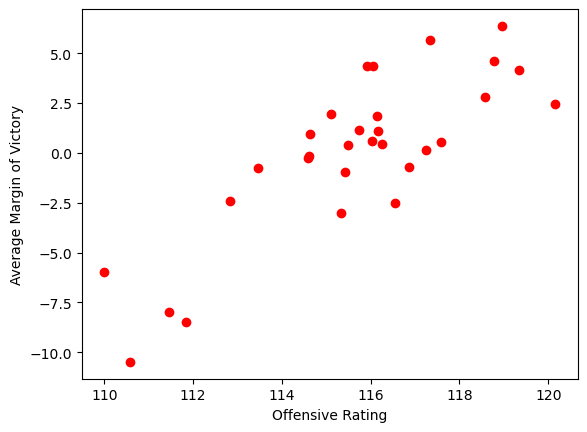

In [2]:
X1=np.array(nba_standings_mar23["ORtg"])
Y=np.array(nba_standings_mar23["MOV"])
model = LinearRegression()
X1=X1.reshape(-1,1)
Y=Y.reshape(-1,1)
model.fit(X1,Y)
plt.plot(X1,Y,'ro')
plt.xlabel('Offensive Rating')
plt.ylabel('Average Margin of Victory')

Sklearn expects array like objects so we first convert to arrays then reshape them per the method suggested in the error string. Then we use the model's' fit method to perform the regression. Finally, we can use the predict method to compute the least squares regression line. 

Text(0, 0.5, 'Average Margin of Victory')

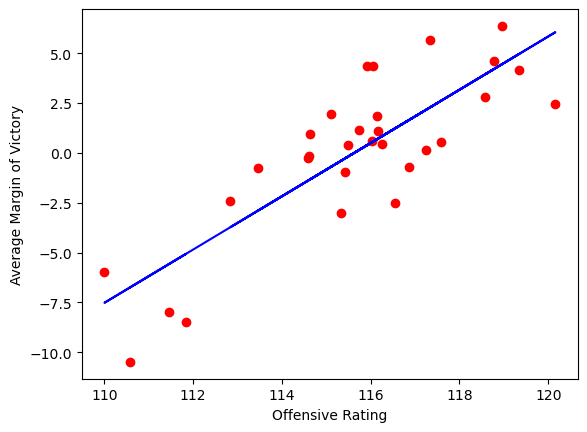

In [5]:
model = LinearRegression()
X1=X1.reshape(-1,1)
Y=Y.reshape(-1,1)
model.fit(X1,Y)
Y_hat = model.predict(X1)
plt.plot(X1,Y,'ro')
plt.plot(X1,Y_hat,'b')
plt.xlabel('Offensive Rating')
plt.ylabel('Average Margin of Victory')

We often want to view the specifics of the model. The following code helps us look at the slope, the intercept, the the R^2 value (in order) of the model we just fit. 

In [6]:
print(model.coef_)
print(model.intercept_)
print(model.score(X1,Y))

[[1.33631684]]
[-154.51710369]
0.6788858069710604


In the next block of code we perform multiple linear regression using a different technique for pre-formatting the data. 

In [11]:
two_feature_model = LinearRegression()
X_ORTG_and_DRTG = nba_standings_mar23[["ORtg","DRtg"]]
MOV=nba_standings_mar23[["MOV"]]
two_feature_model.fit(X_ORTG_and_DRTG,MOV)
print(two_feature_model.score(X_ORTG_and_DRTG,MOV))

0.9993533092170621


This is a perfect example of why we care about domain knowledge in data science. Margin of victory is actually a linear funciton of the offensive rating and defensive rating. The only reason we don't get a perfect model fit is because of rounding errors. However, what happens if we put an extra feature in?

In [24]:
four_feature_model = LinearRegression()
X_with_four = nba_standings_mar23[["ORtg","DRtg","ORtg/A","DRtg/A"]]
four_feature_model.fit(X_with_four,MOV)
print(four_feature_model.score(X_with_four,MOV))
print(four_feature_model.coef_)

0.999389588485911
[[ 1.13025342 -0.89471186 -0.12336707 -0.08802131]]


Lasso uses L1 regularization to induce models with sparse coefficient vectors. This can ensure that superfluous features don't feed into the model

In [23]:
from sklearn.linear_model import Lasso

sparse_model = Lasso(alpha=0.5)
sparse_model.fit(X_with_four,MOV)
print(sparse_model.coef_)

[ 0.94133969 -0.92492896  0.         -0.        ]
